In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import pandas as pd
import copy

import seaborn as sns
sns.set_style('white')
sns.set_style('ticks')

from matplotlib.patches import Patch, Rectangle
from matplotlib.lines import Line2D

from matplotlib.colors import ListedColormap
my_cmap = sns.color_palette(sns.color_palette("Blues",200)).as_hex()
my_cmap[0] = '#ffffff'
blue0 = my_cmap[-1]
my_cmap = ListedColormap(my_cmap)

reds = sns.color_palette(sns.color_palette("Reds",200)).as_hex()
reds[0] = '#ffffff'
reds = ListedColormap(reds)

greens = sns.color_palette(sns.color_palette("Greens",200)).as_hex()
greens[0] = '#ffffff'
greens = ListedColormap(greens)

binary_blue = sns.color_palette(sns.color_palette("Blues",200)).as_hex()
binary_blue[0] = '#ffffff'
blue0 = binary_blue[50]
binary_blue = ListedColormap([binary_blue[0], blue0])

diverging = sns.color_palette(sns.diverging_palette(20, 255, l=60, n=200, center="dark")).as_hex()
diverging = ListedColormap(diverging)

In [2]:
def volumetricPlot(data, widths, depths, prediction=None, title=None, fig=None, ax=None, 
                   cmap=my_cmap, prediction_cmap=None, color = None,
                   flagQV = False, qv_threshold=None,
                   figsize=(10,10), scale=1., binary=True,
                   pass_threshold = 1.e-3, show_threshold=1.e-3):
    if fig is None:
        fig, ax=plt.subplots(figsize=figsize)
    
    if prediction_cmap is None:
        prediction_cmap = cmap
    if qv_threshold is None:
        qv_threshold = pass_threshold
        
    if color is not None:
        cmap = None
        
    for indw,w in enumerate(widths):
        for indd,d in enumerate(depths):
            if w==d and flagQV:
                try:
                    if data[d][w] > qv_threshold:
                        edgecolor='r'
                        linewidth=5*scale
                except:
                    pass
            else:
                edgecolor='k'
                linewidth=1
                
            try:
                datapoint = data[d][w]
                if datapoint >= show_threshold:
                    if datapoint < pass_threshold:
                        datapoint = 0
                        
                    if color is not None:
                        ax.scatter([indd],[indw],marker="s",s=280*scale,c=color,
                               vmin=0,vmax=1, edgecolor=edgecolor,linewidth=linewidth)
                    else:
                        ax.scatter([indd],[indw],marker="s",s=280*scale,c=[datapoint],
                               cmap=cmap, vmin=0,vmax=1, edgecolor=edgecolor,linewidth=linewidth)

                if prediction is not None:
                    predictionpoint = prediction[d][w]
                    if predictionpoint < pass_threshold:
                        predictionpoint = 0
                    if predictionpoint >= show_threshold:
                        ax.scatter([indd],[indw],marker="s",s=30*scale,c=[predictionpoint],
                                   cmap=prediction_cmap, vmin=0,vmax=1)
            except:
                try:
                    if prediction is not None:
                        predictionpoint = prediction[d][w]
                        if predictionpoint < pass_threshold:
                            predictionpoint = 0
                        if predictionpoint >= show_threshold:
                            ax.scatter([indd],[indw],marker="s",s=30*scale,c=[prediction[d][w]],
                                   cmap=prediction_cmap, vmin=0,vmax=1)

                except:
                    pass
                
    ax.set_aspect('equal')
    plt.xlabel('Depth',fontsize=20)
    plt.ylabel('Width',fontsize=20)
    plt.title(title, fontsize=24, y=1.02)
    plt.xlim(-1,len(depths))
    plt.ylim(-1,len(widths))
    depth_labels = [str(d)[0:len(str(d))-((len(str(d))-1)//3)*3]
                     +['', 'k', 'M', 'G'][(len(str(d))-1)//3] 
                     for d in depths]
    plt.xticks(ticks=range(len(depths)),labels=depth_labels,rotation=-60, fontsize=14)
    plt.yticks(ticks=range(len(widths)),labels=widths, fontsize=14)

    sns.despine()
    return fig, ax
    
    

def boundaryPlot(data, threshold=.5, color='k', linewidth=4, title=None, fig = None, ax=None, label=None, linestyle='-'):
    if fig is None:
        fig, ax=plt.subplots(figsize=(10,10))
        ax.set_aspect('equal')
        plt.xlabel('Depth',fontsize=20)
        plt.ylabel('Width',fontsize=20)
        plt.title(title, fontsize=25)
        plt.xlim(-1,len(depths))
        plt.ylim(-1,len(widths))
        depth_labels = [str(d)[0:len(str(d))-((len(str(d))-1)//3)*3]
                         +['', 'k', 'M', 'G'][(len(str(d))-1)//3] 
                         for d in depths]
        plt.xticks(ticks=range(len(depths)),labels=depth_labels,rotation=-60, fontsize=14)
        plt.yticks(ticks=range(len(widths)),labels=widths, fontsize=14)
        sns.despine()
    
    boundries = np.array([np.argmax([-1] + [w for w in widths if data[d][w] >= threshold]) for d in depths])
    last_good = np.max(np.append([-2],np.where(np.array(boundries)>0)[0]))
    boundries = [x-.5 for y in boundries[0:last_good+2] for x in [y,y]]
    markers = [y for x in range(last_good+2) for y in [x-.5,x+.5]]
    plt.plot(markers[0:-1], boundries[0:-1], color, linewidth=linewidth, label=label, linestyle=linestyle)
    return fig, ax

# Examples

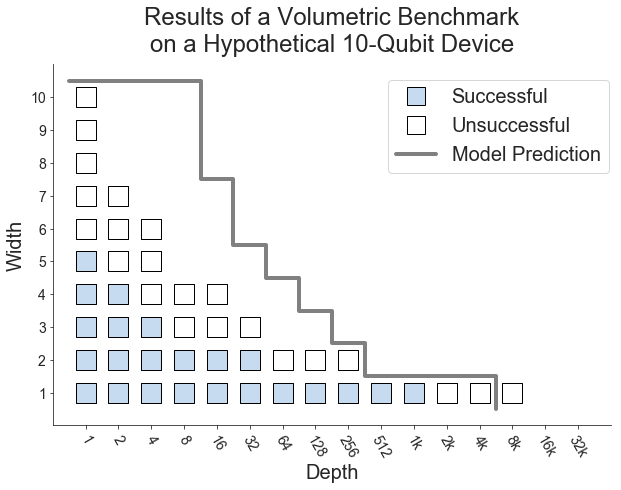

In [3]:
# widths = sorted(list(set([int(np.floor(1.2**n)) for n in range(16)])))
widths = np.arange(1,11)
depths = [2**n for n in range(16)]

def format_data(x, l=5):
    return np.round(x,l)

dataA = {d:{w:format_data((1-(.5e-3+3.e-3*(w-1)))**(w**2.5*(d-.4)),5) for  w in widths} for d in depths}
dataB = {d:{w:format_data((1-(.5e-3+3.e-3*(w-1)))**(w*d),5) for  w in widths} for d in depths}

title = "Results of a Volumetric Benchmark\non a Hypothetical 10-Qubit Device".format(max(widths))

fig, ax = volumetricPlot(dataA, widths, depths, title=title, 
                         show_threshold=.005, pass_threshold=0.08, cmap=binary_blue, binary=True, scale= 1.4);
boundaryPlot(dataB,threshold=.08, color = 'grey', linewidth=4, fig=fig, label = "Device A");

legend_elements = [Line2D([0], [0], marker='s', color='w', 
                          markerfacecolor=blue0, label='Successful', markeredgecolor='k', markersize=18),
                  Line2D([0], [0], marker='s', color='w', 
                          markerfacecolor='w', markeredgecolor='k', label='Unsuccessful', markersize=18),
                  Line2D([0,1], [0,0], color='grey', label='Model Prediction', linewidth=4)]
ax.legend(handles=legend_elements, loc=(.60,.7), fontsize=20)


plt.savefig('intro.pdf', bbox_inches='tight')

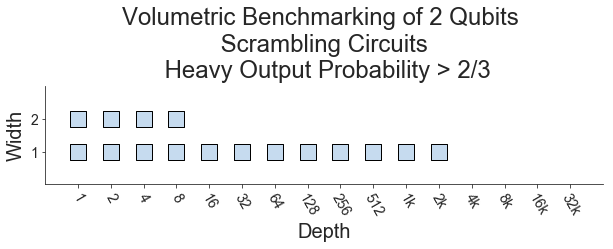

In [4]:
widths = [1,2]
depths = [2**n for n in range(16)]

def format_data(x, l=5):
    return np.round(x,l)
#     return -np.log(1-np.round(x,5))

dataA = {d:{w:format_data((1-(3e-4+3.e-2*(w-1)))**(w*d),5) for  w in widths} for d in depths}

title = "Volumetric Benchmarking of {} Qubits \n Scrambling Circuits \n Heavy Output Probability > 2/3".format(max(widths))
fig = volumetricPlot(dataA, widths, depths, title=title, 
                     show_threshold = 0.5, pass_threshold=0.5, cmap=binary_blue);

# legend_elements = [Line2D([0], [0], marker='s', color='w', 
#                           markerfacecolor=blue0,  markeredgecolor='k', label='Passed', markersize=15),
#                    Line2D([0], [0], marker='s', color='w', 
#                           markerfacecolor='w', markeredgecolor='k', label='Failed', markersize=15)]
# plt.legend(handles=legend_elements, loc='upper right', fontsize=18)



plt.savefig('two_qubits_passed_only.pdf', bbox_inches='tight')

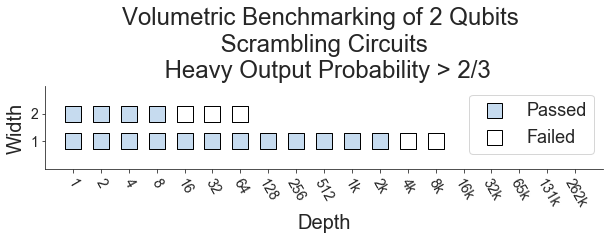

In [5]:
widths = [1,2]
depths = [2**n for n in range(19)]

def format_data(x, l=5):
    return np.round(x,l)
#     return -np.log(1-np.round(x,5))

dataA = {d:{w:format_data((1-(3e-4+3.e-2*(w-1)))**(w*d),5) for  w in widths} for d in depths}

title = "Volumetric Benchmarking of {} Qubits \n Scrambling Circuits \n Heavy Output Probability > 2/3".format(max(widths))
fig = volumetricPlot(dataA, widths, depths, title=title, show_threshold = 0.01, cmap=binary_blue);

legend_elements = [Line2D([0], [0], marker='s', color='w', 
                          markerfacecolor=blue0,  markeredgecolor='k', label='Passed', markersize=15),
                   Line2D([0], [0], marker='s', color='w', 
                          markerfacecolor='w', markeredgecolor='k', label='Failed', markersize=15)]
plt.legend(handles=legend_elements, loc='upper right', fontsize=18)



plt.savefig('two_qubits_binary.pdf', bbox_inches='tight')

In [6]:
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from mpl_toolkits.axes_grid1.colorbar import colorbar

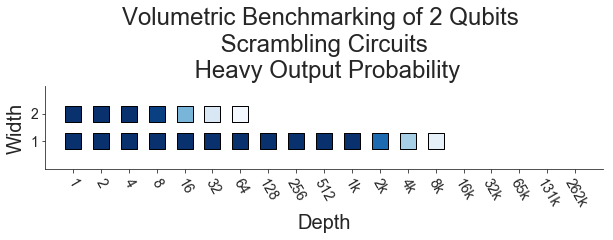

In [7]:
widths = [1,2]
depths = [2**n for n in range(19)]

def format_data(x, l=5):
#     return np.round(x,l)
    return -np.log(1-np.round(x,l))

dataA = {d:{w:format_data((1-(3e-4+3.e-2*(w-1)))**(w*d),5) for  w in widths} for d in depths}

title = "Volumetric Benchmarking of {} Qubits \n Scrambling Circuits \n Heavy Output Probability".format(max(widths))
fig,ax = volumetricPlot(dataA, widths, depths, title=title, show_threshold=0.01);
# boundaryPlot(dataA,threshold=.5, color = 'red', linewidth=4, fig=fig, label = "Device A");
# boundaryPlot(dataB,threshold=.5, color = 'red', linewidth=3, fig=fig, label = 'Device B', linestyle='--');
# plt.legend(fontsize=22)


# legend_elements = [Line2D([0], [0], marker='s', color='w', 
#                           markerfacecolor=blue0,  markeredgecolor='k', label='Passed', markersize=15),
#                    Line2D([0], [0], marker='s', color='w', 
#                           markerfacecolor='w', markeredgecolor='k', label='Failed', markersize=15)]
# plt.legend(handles=legend_elements, loc='upper right', fontsize=18)

plt.savefig('two_qubits_continuous.pdf', bbox_inches='tight')

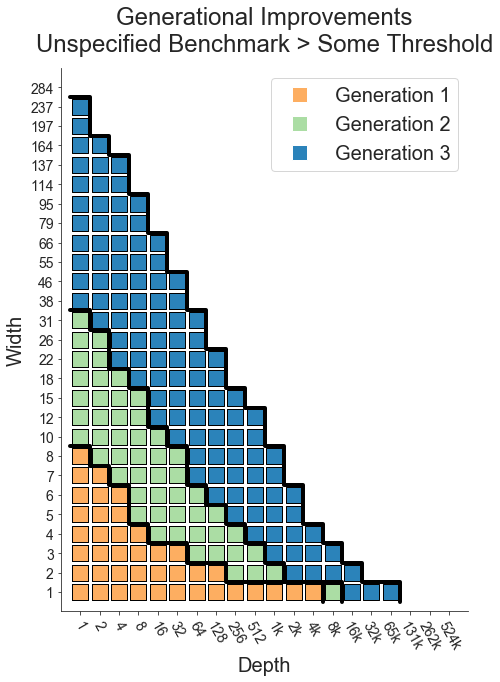

In [8]:
widths = sorted(list(set([int(np.floor(1.2**n)) for n in range(32)])))
depths = [2**n for n in range(20)]

def format_data(x, l=5):
    return np.round(x,l)
#     return -np.log(1-np.round(x,l))

dataA = {d:{w:format_data((1-(.5e-3+3.e-3*(w-1)))**(w**2*d),5) for  w in widths} for d in depths}
dataB = {d:{w:format_data((1-(2.e-4+3.e-4*(w-1)))**(w**1.5*d),5) for  w in widths} for d in depths}
dataC = {d:{w:format_data((1-(3.e-5+.3e-4*(w-1)))**(w*d),5) for  w in widths} for d in depths}

title = "Generational Improvements\nUnspecified Benchmark > Some Threshold"
# ['#66c2a5','#fc8d62','#8da0cb']
c1,c2,c3 = ['#fdae61','#abdda4','#2b83ba']
fig, ax = volumetricPlot(dataC, widths, depths, title=title, cmap=reds, pass_threshold=.1, show_threshold=0.1, color=c3);
volumetricPlot(dataB, widths, depths, title=title, fig=fig, ax=ax,cmap=greens, pass_threshold=.1, show_threshold=0.1, color=c2);
volumetricPlot(dataA, widths, depths, title=title, fig=fig, ax=ax, pass_threshold=.1, show_threshold=0.1, color=c1);
boundaryPlot(dataA,threshold=.1, color = 'k', linewidth=4, fig=fig, label = "Device A");
boundaryPlot(dataB,threshold=.1, color = 'k', linewidth=4, fig=fig, label = 'Device B', linestyle='-');
boundaryPlot(dataC,threshold=.1, color = 'k', linewidth=4, fig=fig, label = 'Device C', linestyle='-');

legend_elements = [Line2D([0], [0], marker='s', color='w', markerfacecolor=c1, label='Generation 1', markersize=15),
                   Line2D([0], [0], marker='s', color='w', markerfacecolor=c2, label='Generation 2', markersize=15),
                   Line2D([0], [0], marker='s', color='w', markerfacecolor=c3, label='Generation 3', markersize=15)]
ax.legend(handles=legend_elements, loc='upper right', fontsize=20)


plt.savefig('improve_binary.pdf', bbox_inches='tight')

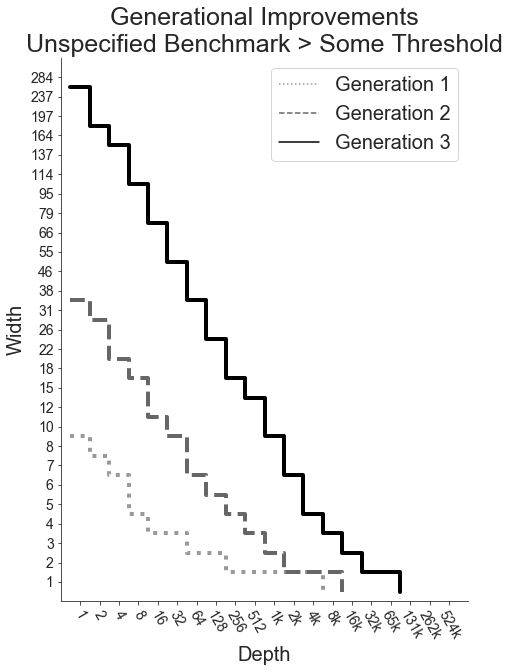

In [9]:
widths = sorted(list(set([int(np.floor(1.2**n)) for n in range(32)])))
depths = [2**n for n in range(20)]

def format_data(x, l=5):
    return np.round(x,l)
#     return -np.log(1-np.round(x,l))

# dataA = {d:{w:format_data((1-(.5e-3+3.e-3*(w-1)))**(w*d),5) for  w in widths} for d in depths}
# dataB = {d:{w:format_data((1-(2.e-4+3.e-4*(w-1)))**(w*d),5) for  w in widths} for d in depths}
# dataC = {d:{w:format_data((1-(3.e-5+.3e-4*(w-1)))**(w*d),5) for  w in widths} for d in depths}

title = "Generational Improvements\nUnspecified Benchmark > Some Threshold"
# ['#66c2a5','#fc8d62','#8da0cb']
c1,c2,c3 = ['#fdae61','#abdda4','#2b83ba']
# fig, ax = volumetricPlot(dataC, widths, depths, title=title, cmap=reds, pass_threshold=.001, color=c3);
# volumetricPlot(dataB, widths, depths, title=title, fig=fig, ax=ax,cmap=greens, pass_threshold=.001, color=c2);
# volumetricPlot(dataA, widths, depths, title=title, fig=fig, ax=ax, pass_threshold=.01, color=c1);
fig, ax = boundaryPlot(dataA,threshold=.1, color = '#999999', linewidth=4, label = "Device A", linestyle=':', title=title);
boundaryPlot(dataB,threshold=.1, color = '#666666', linewidth=4, fig=fig, label = 'Device B', linestyle='--');
boundaryPlot(dataC,threshold=.1, color = '#000000', linewidth=4, fig=fig, label = 'Device C', linestyle='-');

legend_elements = [Line2D([0], [0], color='#999999', label='Generation 1', linestyle=':'),
                   Line2D([0], [0], color='#666666', label='Generation 2', linestyle='--'),
                   Line2D([0], [0], color='#000000', label='Generation 3', linestyle='-')]
ax.legend(handles=legend_elements, loc='upper right', fontsize=20)


plt.savefig('improve_lines.pdf', bbox_inches='tight')

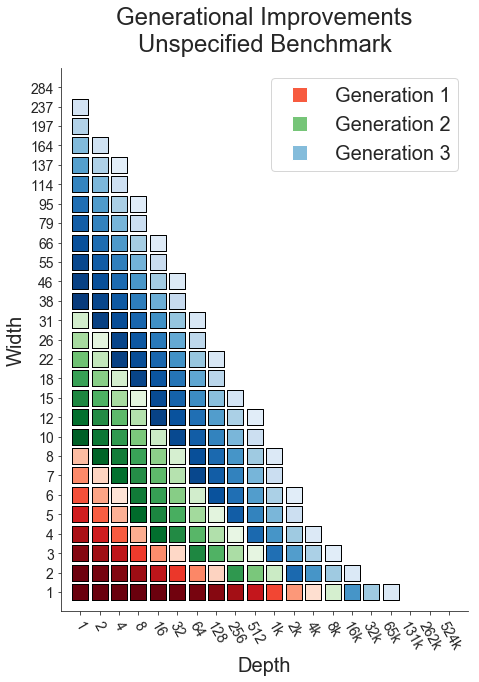

In [10]:
widths = sorted(list(set([int(np.floor(1.2**n)) for n in range(32)])))
depths = [2**n for n in range(20)]

def format_data(x, l=5):
    return np.round(x,l)
#     return -np.log(1-np.round(x,l))

# dataA = {d:{w:format_data((1-(.5e-3+3.e-3*(w-1)))**(w*d),5) for  w in widths} for d in depths}
# dataB = {d:{w:format_data((1-(2.e-4+3.e-4*(w-1)))**(w*d),5) for  w in widths} for d in depths}
# dataC = {d:{w:format_data((1-(3.e-5+.3e-4*(w-1)))**(w*d),5) for  w in widths} for d in depths}

title = "Generational Improvements\nUnspecified Benchmark"
fig, ax = volumetricPlot(dataC, widths, depths, title=title, 
                         cmap=my_cmap, pass_threshold=.1, show_threshold=.1);
volumetricPlot(dataB, widths, depths, title=title, fig=fig, ax=ax,cmap=greens, 
               pass_threshold=.01, show_threshold=0.1);
volumetricPlot(dataA, widths, depths, title=title, fig=fig, ax=ax, cmap=reds, 
               pass_threshold=.01, show_threshold=0.1);
# boundaryPlot(dataA,threshold=.1, color = 'k', linewidth=4, fig=fig, label = "Device A");
# boundaryPlot(dataB,threshold=.1, color = 'k', linewidth=4, fig=fig, label = 'Device B', linestyle='--');
# boundaryPlot(dataC,threshold=.1, color = 'k', linewidth=4, fig=fig, label = 'Device C', linestyle=':');

legend_elements = [Line2D([0], [0], marker='s', color='w', markerfacecolor='#f75b40', label='Generation 1', markersize=15),
                   Line2D([0], [0], marker='s', color='w', markerfacecolor='#76c578', label='Generation 2', markersize=15),
                   Line2D([0], [0], marker='s', color='w', markerfacecolor='#84bcdb', label='Generation 3', markersize=15)]
ax.legend(handles=legend_elements, loc='upper right', fontsize=20)


plt.savefig('improve_continuous.pdf', bbox_inches='tight')

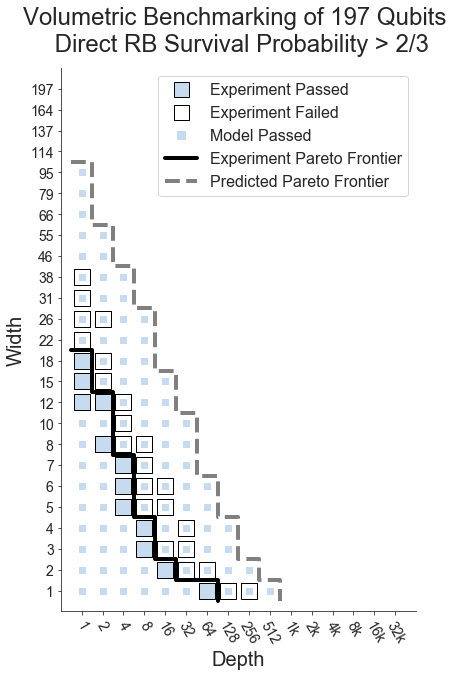

In [11]:
widths = sorted(list(set([int(np.floor(1.2**n)) for n in range(30)])))
depths = [2**n for n in range(16)]

np.random.seed(12363)

def format_data(x, l=5):
    return np.round(x,l)
#     return -np.log(1-np.round(x,l))

# prediction = {d:{w:format_data((1-(1.e-3 + 1.e-4*(w-1)))**(w*d),5) for  w in widths} for d in depths}
# data = {d:{w:format_data((1-(1.e-3 + 1.e-3*(w-1)))**(w*d),5) for  w in widths} for d in depths}
prediction = {d:{w:format_data((1-(1.e-3 + 1.e-4*(w-1)))**(w*(d-.5)),5) for  w in widths} for d in depths}
data = {d:{w:format_data((1-(1.e-3 + 1.e-3*(w-1)))**(w**1.2*d**1.5),5) for  w in widths} for d in depths}


boundary_data = copy.deepcopy(data)

for depth in depths:
    for width in widths:
        if data[depth][width] > .8 or data[depth][width] < 0.01:
            data[depth].pop(width)
for depth in depths:
    for indb in range(np.random.randint(1,3)):
        try:
            xwidth =  np.random.choice(list(data[depth].keys()))
            if xwidth > 3 and depth>1:
                if (xwidth,depth) not in [(6,8),(5,8)]:
                    data[depth].pop( xwidth ) 
        except:
            pass


title = "Volumetric Benchmarking of 197 Qubits \n Direct RB Survival Probability > 2/3"
fig = volumetricPlot(data, widths, depths, prediction, title=title, show_threshold=0.01, pass_threshold=0.5, cmap=binary_blue, scale=1);
boundaryPlot(boundary_data,threshold=.50, fig=fig, label='Measured');
boundaryPlot(prediction,threshold=.5, color = 'grey', fig=fig, label = "Predicted", linestyle='--');

legend_elements = [Line2D([0], [0], marker='s', color='w', 
                          markerfacecolor=blue0,  markeredgecolor='k', label='Experiment Passed', markersize=15),
                   Line2D([0], [0], marker='s', color='w', 
                          markerfacecolor='w', markeredgecolor='k', label='Experiment Failed', markersize=15),
                   Line2D([0], [0], marker='s', color='w', 
                          markerfacecolor=blue0, label='Model Passed', markersize=10),
                   Line2D([0,1], [0,0], color='k', linewidth=4, 
                         label='Experiment Pareto Frontier'),
                   Line2D([0,1], [0,0], color='grey', linewidth=4, 
                         label='Predicted Pareto Frontier', linestyle='--')]
plt.legend(handles=legend_elements, loc='upper right', fontsize=16)

plt.savefig('example197_randomized.pdf', bbox_inches='tight')

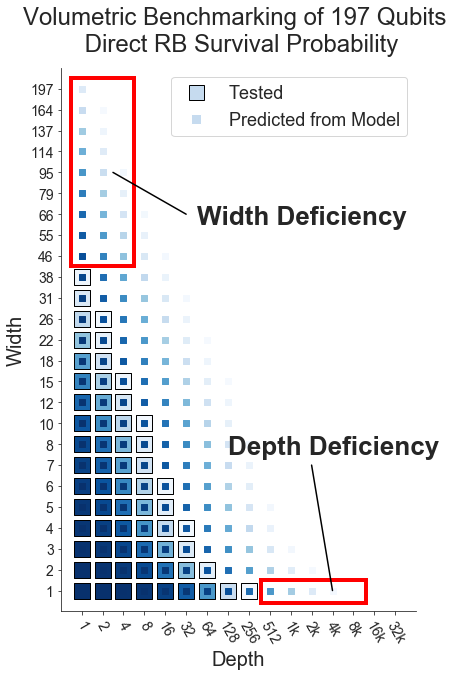

In [12]:
widths = sorted(list(set([int(np.floor(1.2**n)) for n in range(30)])))
depths = [2**n for n in range(16)]
def format_data(x, l=5):
    return np.round(x,l)

from matplotlib.font_manager import FontProperties
font0 = FontProperties()
font1 = font0.copy()
font1.set_size(26)
font1.set_weight('bold')

prediction = {d:{w:format_data((1-(1.e-3 + 1.e-4*(w-1)))**(w*(d-.5)),5) for  w in widths} for d in depths}
data = {d:{w:format_data((1-(1.e-3 + 1.e-3*(w-1)))**(w**1.2*d**1.5),5) for  w in widths} for d in depths}

title = "Volumetric Benchmarking of 197 Qubits \n Direct RB Survival Probability"
fig,ax = volumetricPlot(data, widths, depths, prediction, title=title, show_threshold=0.01);
ax.add_patch(Rectangle((8.6,-.6), 5, 1.1, fill=False,edgecolor='red', linewidth=4,zorder=0))
ax.add_patch(Rectangle((-.5,15.5), 3, 9, fill=False,edgecolor='r', linestyle='-', linewidth=4,zorder=0))

plt.text(5.5,17.5,'Width Deficiency', fontsize=22, fontproperties=font1)
plt.plot([1.5,5],[20,18],'k')

plt.text(7,6.5,'Depth Deficiency', fontsize=23, fontproperties=font1)
plt.plot([12,11],[0,6],'k')



legend_elements = [Line2D([0], [0], marker='s', color='w', 
                          markerfacecolor=blue0,  markeredgecolor='k', label='Tested', markersize=15),
                   Line2D([0], [0], marker='s', color='w', 
                          markerfacecolor=blue0, label='Predicted from Model', markersize=10)]
plt.legend(handles=legend_elements, loc='upper right', fontsize=18)

plt.savefig('example197_notes.pdf', bbox_inches='tight')

### 16 qubits with crosstalk

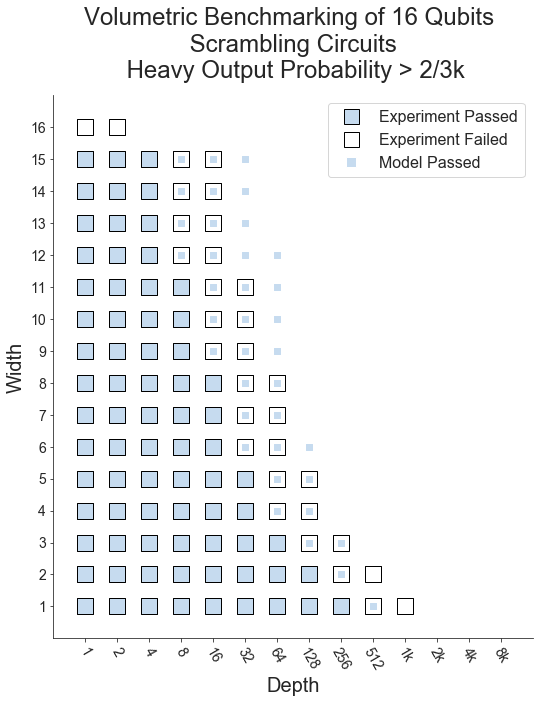

In [13]:
widths = np.arange(1,16+1)
depths = [2**n for n in range(14)]

def format_data(x, l=5):
#     return np.round(x,l)
    return 1 if x>2./3 else 0

round_to = 0
prediction = {d:{w:format_data((1-5.e-4)**(w*d),round_to) for  w in widths} for d in depths}
data = {d:{w:format_data((1-(1.e-3+3.e-4*(w-1)))**(w*d),round_to) for  w in widths} for d in depths}
for d in data.keys():
    data[d][16]=0
    prediction[d][16]=0
    
boundary_data = copy.deepcopy(data)
for w in widths:
    check = 0
    for d in depths:
        if check == 2:
            data[d].pop(w)
        else:
            if data[d][w] == 0:
                check += 1

title = "Volumetric Benchmarking of 16 Qubits \n Scrambling Circuits \n Heavy Output Probability > 2/3k"
fig,ax = volumetricPlot(data, widths, depths, prediction=prediction, title=title, show_threshold = -1, cmap=binary_blue );

legend_elements = [Line2D([0], [0], marker='s', color='w', 
                          markerfacecolor=blue0,  markeredgecolor='k', label='Experiment Passed', markersize=15),
                   Line2D([0], [0], marker='s', color='w', 
                          markerfacecolor='w', markeredgecolor='k', label='Experiment Failed', markersize=15),
                   Line2D([0], [0], marker='s', color='w', 
                          markerfacecolor=blue0, label='Model Passed', markersize=10),]
plt.legend(handles=legend_elements, loc='upper right', fontsize=16)

plt.savefig('example16.pdf', bbox_inches='tight')

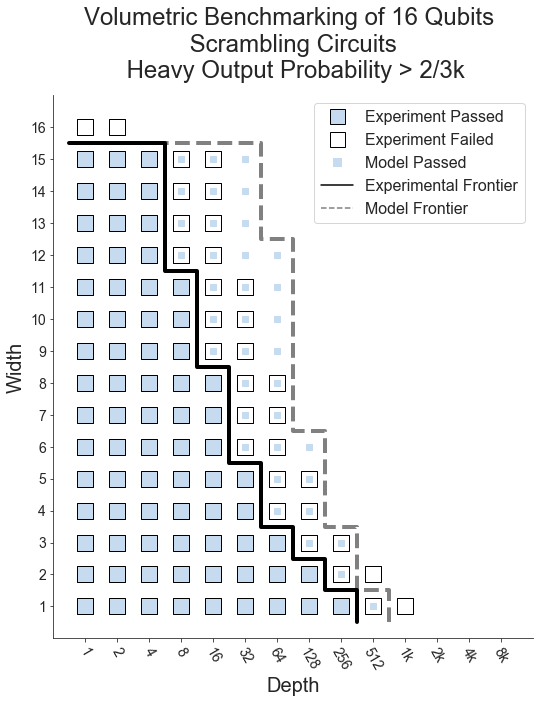

In [14]:
widths = np.arange(1,16+1)
depths = [2**n for n in range(14)]

def format_data(x, l=5):
#     return np.round(x,l)
    return 1 if x>2./3 else 0

round_to = 0
prediction = {d:{w:format_data((1-5.e-4)**(w*d),round_to) for  w in widths} for d in depths}
data = {d:{w:format_data((1-(1.e-3+3.e-4*(w-1)))**(w*d),round_to) for  w in widths} for d in depths}
for d in data.keys():
    data[d][16]=0
    prediction[d][16]=0
    
boundary_data = copy.deepcopy(data)
for w in widths:
    check = 0
    for d in depths:
        if check == 2:
            data[d].pop(w)
        else:
            if data[d][w] == 0:
                check += 1



title = "Volumetric Benchmarking of 16 Qubits \n Scrambling Circuits \n Heavy Output Probability > 2/3k"
fig,ax = volumetricPlot(data, widths, depths, prediction=prediction, title=title, show_threshold = -1, cmap=binary_blue );
boundaryPlot(prediction, threshold=.1, fig=fig, color='grey', linestyle='--');
boundaryPlot(boundary_data, threshold=.1, fig=fig);


legend_elements = [Line2D([0], [0], marker='s', color='w', 
                          markerfacecolor=blue0,  markeredgecolor='k', label='Experiment Passed', markersize=15),
                   Line2D([0], [0], marker='s', color='w', 
                          markerfacecolor='w', markeredgecolor='k', label='Experiment Failed', markersize=15),
                   Line2D([0], [0], marker='s', color='w', 
                          markerfacecolor=blue0, label='Model Passed', markersize=10),
                  Line2D([0], [0], color='k', 
                          label='Experimental Frontier'),
                  Line2D([0], [0], color='grey', 
                          label='Model Frontier', linestyle='--')]
plt.legend(handles=legend_elements, loc='upper right', fontsize=16)

plt.savefig('example16_boundary.pdf', bbox_inches='tight')

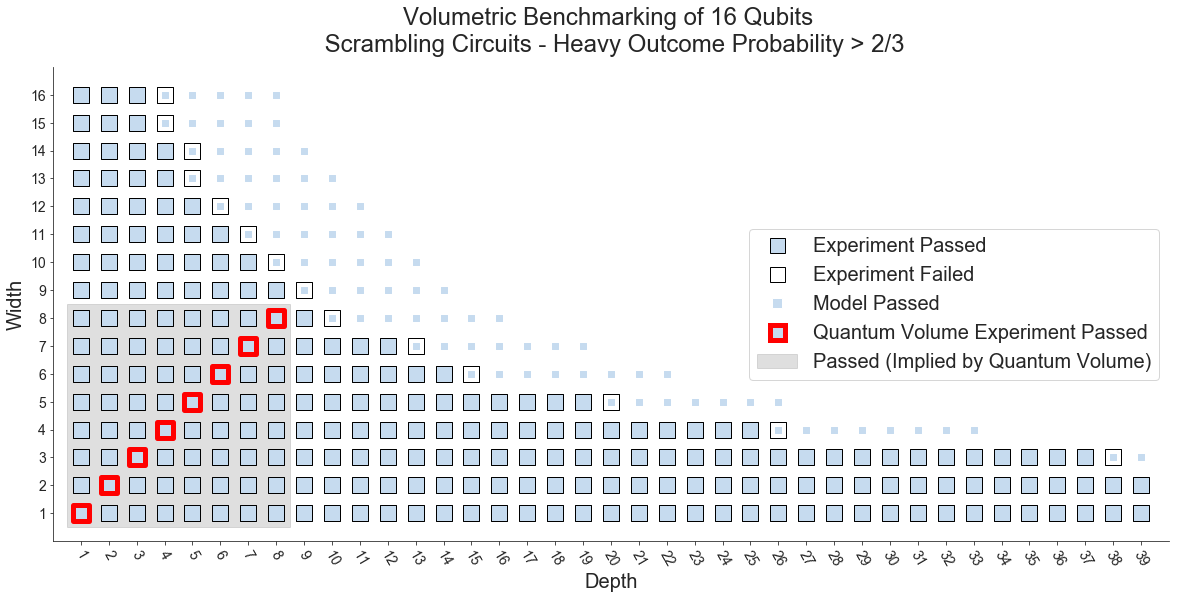

In [15]:
widths = range(1,16+1)
depths = range(1,40)

def format_data(x, l=5):
#     return np.round(x,l)
    return 1 if x>2./3 else 0

round_to = 0
prediction = {d:{w:format_data((1-3.e-3)**(w*d),round_to) for  w in widths} for d in depths}
data = {d:{w:format_data((1-(3.e-3+3.e-4*(w-1)))**(w*d),round_to) for  w in widths} for d in depths}
for w in widths:
    check = 0
    for d in depths:
        if check == 1:
            data[d].pop(w)
        else:
            if data[d][w] == 0:
                check = 1

title = "Volumetric Benchmarking of 16 Qubits \n Scrambling Circuits - Heavy Outcome Probability > 2/3"
fig,ax = volumetricPlot(data, widths, depths, prediction=prediction, title=title, 
                        cmap=binary_blue, 
                        flagQV=True, figsize=(20,10), scale=1, qv_threshold=.1, show_threshold=-1 );
# ax.add_patch(Rectangle((-.5,-.5), 8, 8, color='#00AA00',zorder=0,alpha=.15))
ax.add_patch(Rectangle((-.5,-.5), 8, 8, color='grey',zorder=0,alpha=.25))
legend_elements = [Line2D([0], [0], marker='s', color='w', 
                          markerfacecolor=blue0,  markeredgecolor='k', label='Experiment Passed', markersize=15),
                   Line2D([0], [0], marker='s', color='w', 
                          markerfacecolor='w', markeredgecolor='k', label='Experiment Failed', markersize=15),
                   Line2D([0], [0], marker='s', color='w', 
                          markerfacecolor=blue0, label='Model Passed', markersize=10),
                   Line2D([0], [0], marker='s', color='w', 
                          markerfacecolor=blue0,  markeredgecolor='r', 
                         label='Quantum Volume Experiment Passed', markersize=15, markeredgewidth=5),
                   Rectangle((-.5,-.5), 10, 10, color='grey',alpha=.25, label='Passed (Implied by Quantum Volume)')]
plt.legend(handles=legend_elements, loc='center right', fontsize=20)


plt.savefig('QVsquare.pdf', bbox_inches='tight')

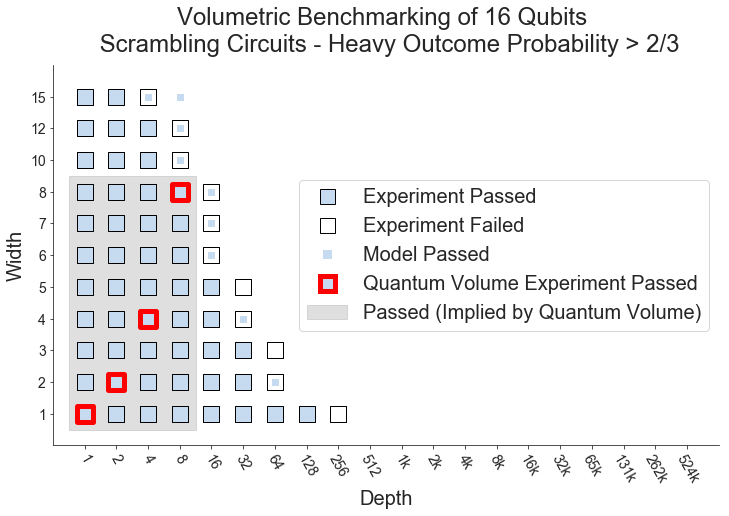

In [16]:
widths = sorted(list(set([int(np.floor(1.2**n)) for n in range(16)])))
depths = [2**n for n in range(20)]

def format_data(x, l=5):
#     return np.round(x,l)
    return 1 if x>2./3 else 0

round_to = 0
prediction = {d:{w:format_data((1-3.e-3)**(w*d),round_to) for  w in widths} for d in depths}
data = {d:{w:format_data((1-(3.e-3+3.e-4*(w-1)))**(w*d),round_to) for  w in widths} for d in depths}
for w in widths:
    check = 0
    for d in depths:
        if check == 1:
            data[d].pop(w)
        else:
            if data[d][w] == 0:
                check = 1

title = "Volumetric Benchmarking of 16 Qubits \n Scrambling Circuits - Heavy Outcome Probability > 2/3"
fig,ax = volumetricPlot(data, widths, depths, prediction=prediction, title=title, 
                        cmap=binary_blue, 
                        flagQV=True, figsize=(15,7), show_threshold=-1, qv_threshold=0.1 );
ax.add_patch(Rectangle((-.5,-.5), 4, 8, color='grey',zorder=0,alpha=.25))
legend_elements = [Line2D([0], [0], marker='s', color='w', 
                          markerfacecolor=blue0,  markeredgecolor='k', label='Experiment Passed', markersize=15),
                   Line2D([0], [0], marker='s', color='w', 
                          markerfacecolor='w', markeredgecolor='k', label='Experiment Failed', markersize=15),
                   Line2D([0], [0], marker='s', color='w', 
                          markerfacecolor=blue0, label='Model Passed', markersize=10),
                   Line2D([0], [0], marker='s', color='w', 
                          markerfacecolor=blue0,  markeredgecolor='r', 
                         label='Quantum Volume Experiment Passed', markersize=15, markeredgewidth=5),
                   Rectangle((-.5,-.5), 10, 10, color='grey',alpha=.25, label='Passed (Implied by Quantum Volume)')]
plt.legend(handles=legend_elements, loc='center right', fontsize=20)

plt.savefig('QVlog.pdf', bbox_inches='tight')